## Global Imports

In [5]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

## Reading In Dataset

In [11]:
train_variants_df = pd.read_csv("training_variants")
test_variants_df = pd.read_csv("test_variants")
train_text_df = pd.read_csv("training_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
test_text_df = pd.read_csv("test_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])

## Dataset Count

In [ ]:
print("Train Variant".ljust(15), train_variants_df.shape)
print("Train Text".ljust(15), train_text_df.shape)
print("Test Variant".ljust(15), test_variants_df.shape)
print("Test Text".ljust(15), test_text_df.shape)

## Dataset Size

In [9]:
for f in os.listdir():
    if f in ["training_variants","test_variants","training_text","test_text"]:
        size_bytes = round(os.path.getsize(f)/ 1000, 2)
        size_name = ["KB", "MB"]
        i = int(math.floor(math.log(size_bytes, 1024)))
        p = math.pow(1024, i)
        s = round(size_bytes / p, 2)
        print(f.ljust(20) + str(s).ljust(7) + size_name[i])

training_variants   66.69  KB
training_text       207.15 MB
test_variants       93.36  KB
test_text           313.3  MB


## Glimpse Of Data

In [12]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [13]:
print( "Total No OF Unique Genes",len(train_variants_df.Gene.unique()))
print("Total No OF Unique Variants",len(train_variants_df.Variation.unique()))
print("Total No OF Unique Class",len(train_variants_df.Class.unique()))

Total No OF Unique Genes 264
Total No OF Unique Variants 2996
Total No OF Unique Class 9


## Visualizing Dependent Variable

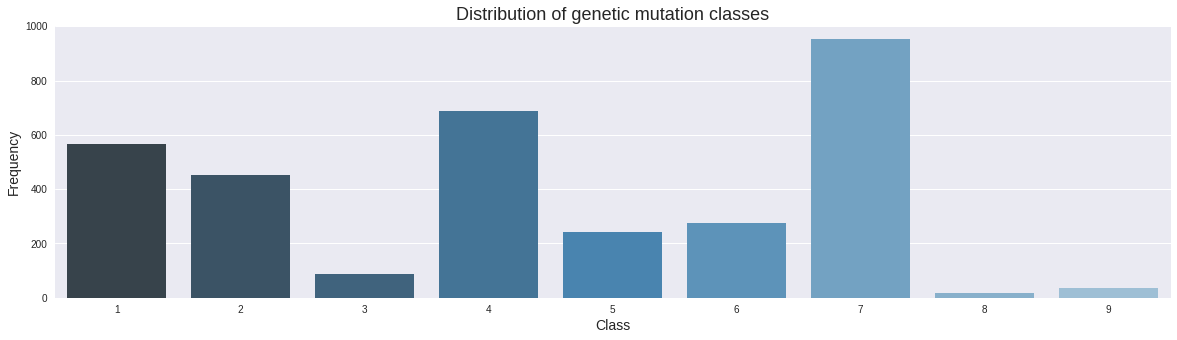

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x="Class", data=train_variants_df, palette="Blues_d")
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Distribution of genetic mutation classes", fontsize=18)
plt.show()

## Top Occuring Gene

In [16]:
gene_group = train_variants_df.groupby("Gene")['Gene'].count()
minimal_occ_genes = gene_group.sort_values(ascending=True)[:10]
print("Genes with maximal occurences\n", gene_group.sort_values(ascending=False)[:10])
print("\nGenes with minimal occurences\n", minimal_occ_genes)

Genes with maximal occurences
 Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64

Genes with minimal occurences
 Gene
KLF4      1
FGF19     1
FANCC     1
FAM58A    1
PAK1      1
ERRFI1    1
PAX8      1
PIK3R3    1
PMS1      1
PPM1D     1
Name: Gene, dtype: int64


## Top Genes From Each Class

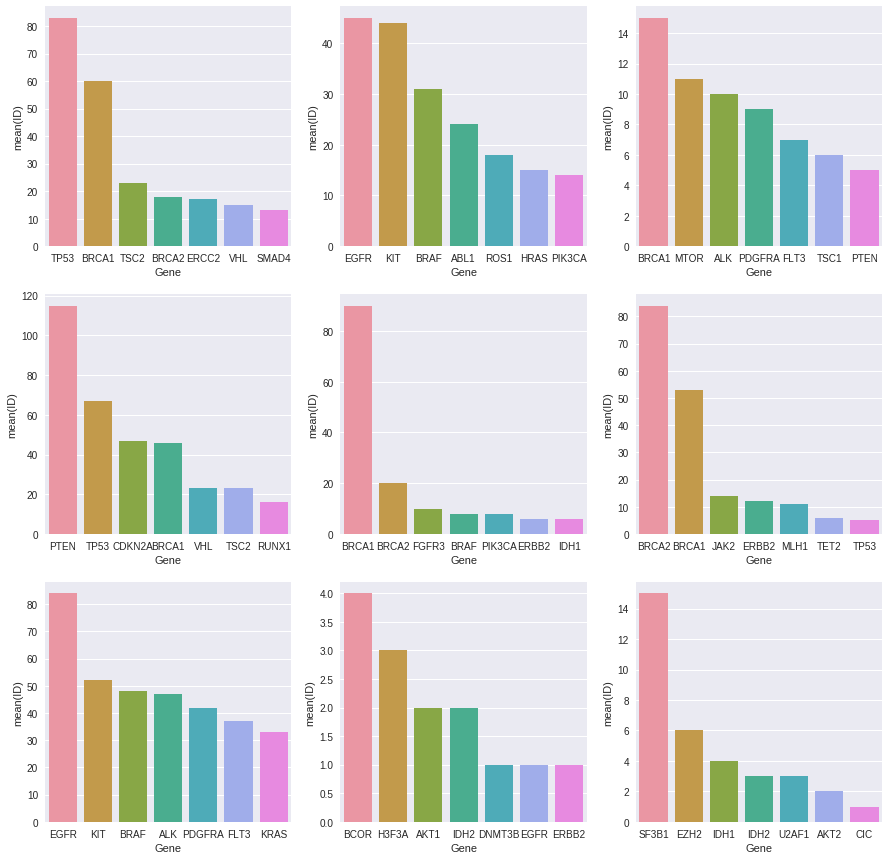

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = train_variants_df[train_variants_df["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])

Some points we can conclude from these graphs:
* BRCA1 is highly dominating Class 5
* SF3B1 is highly dominating Class 9
* BRCA1 and BRCA2 are dominating Class 6

## Insights On Text Data

In [18]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [19]:
train_text_df['Text_count']  = train_text_df["Text"].apply(lambda x: len(x.split()))
train_text_df.head()

,ID,Text,Text_count
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,Abstract Background Non-small cell lung canc...,5756
2,2,Abstract Background Non-small cell lung canc...,5756
3,3,Recent evidence has demonstrated that acquired...,5572
4,4,Oncogenic mutations in the monomeric Casitas B...,6202


## Merging Variants And Text File

In [20]:
train_full = train_variants_df.merge(train_text_df, how="inner", left_on="ID", right_on="ID")
train_full[train_full["Class"]==1].head()

,ID,Gene,Variation,Class,Text,Text_count
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...,14683
16,16,CBL,Truncating Mutations,1,To determine if residual cylindrical refractiv...,8118
37,37,DICER1,D1709E,1,Sex cord–stromal tumors and germ-cell tumors a...,2710
38,38,DICER1,D1709A,1,Sex cord–stromal tumors and germ-cell tumors a...,2710


## Summary On Text Count Field

In [21]:
count_grp = train_full.groupby('Class')["Text_count"]
count_grp.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1,568.0,9450.299296,6516.412101,1.0,4973.0,7305.0,12873.5,52972.0
2,452.0,9310.393805,7627.288722,116.0,4185.0,6810.0,12220.0,61957.0
3,89.0,6757.382022,3725.366918,1737.0,4283.0,5572.0,7415.0,27391.0
4,686.0,8983.390671,7280.220754,53.0,4566.0,6351.0,11537.0,43913.0
5,242.0,7517.049587,3902.868040,183.0,5245.0,6463.0,9513.5,24226.0
6,275.0,7184.120000,3836.912865,1.0,4505.5,6587.0,7847.0,24609.0
7,953.0,11442.867786,10111.940846,1.0,4871.0,8254.0,14620.0,76782.0
8,19.0,10814.421053,5648.714095,2111.0,5586.0,11253.0,15535.0,20626.0
9,37.0,12807.459459,10217.093429,1147.0,4942.0,10930.0,15797.0,45177.0


In [22]:
train_full[train_full["Text_count"]==1.0]

,ID,Gene,Variation,Class,Text,Text_count
1109,1109,FANCA,S1088F,1,null,1
1277,1277,ARID5B,Truncating Mutations,1,null,1
1407,1407,FGFR3,K508M,6,null,1
1639,1639,FLT1,Amplification,6,null,1
2755,2755,BRAF,G596C,7,null,1


## Distribution Of Text Count

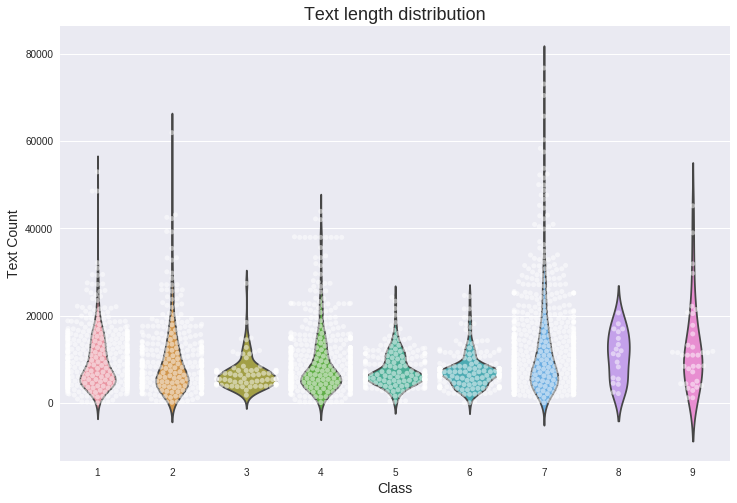

In [23]:
plt.figure(figsize=(12,8))
#gene_count_grp = train_full.groupby('Gene')["Text_count"].sum().reset_index()
sns.violinplot(x="Class", y="Text_count", data=train_full, inner=None)
sns.swarmplot(x="Class", y="Text_count", data=train_full, color="w", alpha=.5);
plt.ylabel('Text Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Text length distribution", fontsize=18)
plt.show()

## Utility Function To Transform Text Fields

In [33]:
def top_tfidf_feats(row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=10):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=10):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 100), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        #z = int(str(int(i/3)+1) + str((i%3)+1))
        ax = fig.add_subplot(9, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Gene", labelpad=16, fontsize=16)
        ax.set_title("Class = " + str(df.label), fontsize=18)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.bar(x,df.tfidf, align='center')
        ax.set_yticks(x)
        #ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

## Extracting Top Text Fields

In [34]:
tfidf = TfidfVectorizer(
    min_df=5, max_features=16000, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(train_full["Text"])

Xtr = tfidf.fit_transform(train_full["Text"])
y = train_full["Class"]
features = tfidf.get_feature_names()
top_dfs = top_feats_by_class(Xtr, y, features)

## Visualizing Text Field

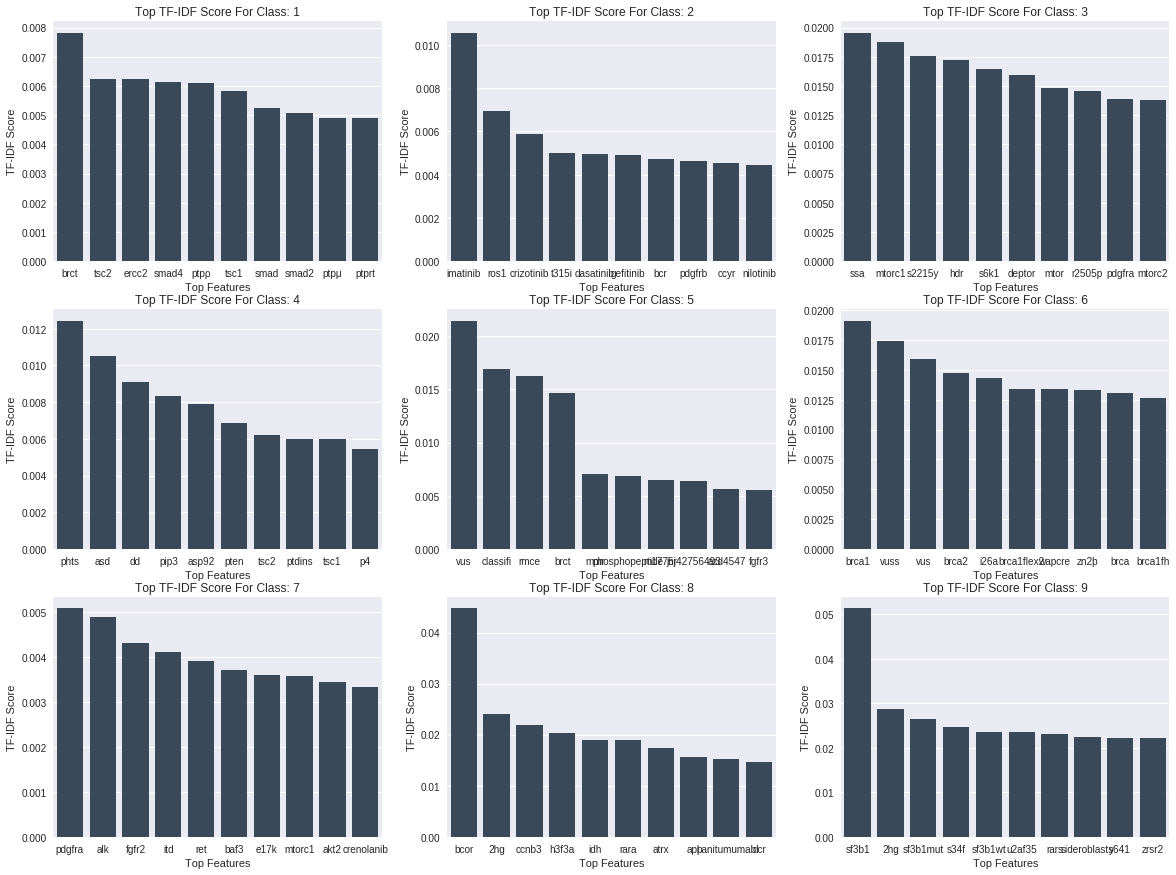

In [43]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,15))
count = 0
for i in range(3):
    for j in range(3):
        sns.barplot(x="feature", y="tfidf", data=top_dfs[count], ax=axs[i][j],color="#34495e")
        axs[i][j].set(xlabel="Top Features",ylabel = "TF-IDF Score",title="Top TF-IDF Score For Class: " + str(count+1))
        count+=1

In [46]:
from sklearn import *
import sklearn
import xgboost as xgb

## Reading In Dataset

In [45]:
train = pd.read_csv('training_variants')
test = pd.read_csv('test_variants')
trainx = pd.read_csv('training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
testx = pd.read_csv('test_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [47]:
train = pd.merge(train, trainx, how='left', on='ID').fillna('')
y = train['Class'].values
train = train.drop(['Class'], axis=1)

test = pd.merge(test, testx, how='left', on='ID').fillna('')
pid = test['ID'].values

## Combining Train And Test

In [48]:
df_all = pd.concat((train, test), axis=0, ignore_index=True)

## Creating New Features From Gene And Variation Column

In [49]:
df_all['Gene_Share'] = df_all.apply(lambda r: sum([1 for w in r['Gene'].split(' ') if w in r['Text'].split(' ')]), axis=1)
df_all['Variation_Share'] = df_all.apply(lambda r: sum([1 for w in r['Variation'].split(' ') if w in r['Text'].split(' ')]), axis=1)

## Label Encoding Variables

In [50]:
for c in df_all.columns:
    if df_all[c].dtype == 'object':
        if c in ['Gene','Variation']:
            lbl = preprocessing.LabelEncoder()
            df_all[c+'_lbl_enc'] = lbl.fit_transform(df_all[c].values)  
            df_all[c+'_len'] = df_all[c].map(lambda x: len(str(x)))
            df_all[c+'_words'] = df_all[c].map(lambda x: len(str(x).split(' ')))
        elif c != 'Text':
            lbl = preprocessing.LabelEncoder()
            df_all[c] = lbl.fit_transform(df_all[c].values)
        if c=='Text': 
            df_all[c+'_len'] = df_all[c].map(lambda x: len(str(x)))
            df_all[c+'_words'] = df_all[c].map(lambda x: len(str(x).split(' '))) 

## Retrieving Train And Test

In [51]:
train = df_all.iloc[:len(train)]
test = df_all.iloc[len(train):]

## Defining Data Transformation Pipelines

In [52]:

class cust_regression_vals(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        x = x.drop(['Gene', 'Variation','ID','Text'],axis=1).values
        return x

class cust_txt_col(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.key].apply(str)

print('Pipeline...')
fp = pipeline.Pipeline([
    ('union', pipeline.FeatureUnion(
        n_jobs = -1,
        transformer_list = [
            ('standard', cust_regression_vals()),
            ('pi1', pipeline.Pipeline([
                ('Gene', cust_txt_col('Gene')),\
                ('count_Gene', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))),\
                ('tsvd1', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))
            ])),
            ('pi2', pipeline.Pipeline([
                ('Variation', cust_txt_col('Variation')),\
                ('count_Variation', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))),\
                ('tsvd2', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))
            ])),
            #('pi3', pipeline.Pipeline([
                #('Text', cust_txt_col('Text')),\
                #('tfidf_Text', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2))),\
                #('tsvd3', decomposition.TruncatedSVD(n_components=50, n_iter=25, random_state=12))
            #]))
        ])
    )
])

train = fp.fit_transform(train); print(train.shape)
test = fp.transform(test); print(test.shape)

y = y - 1 #fix for zero bound array
denom = 0

Pipeline...
(3321, 50)
(5668, 50)


## XGBoost Model

In [53]:
params = {
    'eta': 0.03333,
    'max_depth': 4,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 9,
    'seed': 100,
    'silent': True
}

x1, x2, y1, y2 = model_selection.train_test_split(train, y, test_size=0.18, random_state=100)
watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
model = xgb.train(params, xgb.DMatrix(x1, y1), 1000,  watchlist, verbose_eval=50, early_stopping_rounds=100)
score1 = metrics.log_loss(y2, model.predict(xgb.DMatrix(x2), ntree_limit=model.best_ntree_limit), labels = list(range(9)))
print(score1)

preds = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit+80)
submission = pd.DataFrame(preds, columns=['class'+str(c+1) for c in range(9)])
submission['ID'] = pid
submission.to_csv('submission_xgb.csv', index=False)

[0]	train-mlogloss:2.14735	valid-mlogloss:2.14938
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[50]	train-mlogloss:1.24458	valid-mlogloss:1.33298
[100]	train-mlogloss:0.985012	valid-mlogloss:1.15062
[150]	train-mlogloss:0.83945	valid-mlogloss:1.07421
[200]	train-mlogloss:0.734783	valid-mlogloss:1.03645
[250]	train-mlogloss:0.65459	valid-mlogloss:1.01273
[300]	train-mlogloss:0.591295	valid-mlogloss:1.00089
[350]	train-mlogloss:0.537284	valid-mlogloss:0.993473
[400]	train-mlogloss:0.490358	valid-mlogloss:0.990603
[450]	train-mlogloss:0.444772	valid-mlogloss:0.990111
[500]	train-mlogloss:0.407549	valid-mlogloss:0.989784
[550]	train-mlogloss:0.372204	valid-mlogloss:0.989562
[600]	train-mlogloss:0.338683	valid-mlogloss:0.99314
Stopping. Best iteration:
[512]	train-mlogloss:0.398182	valid-mlogloss:0.988619

0.988619033475


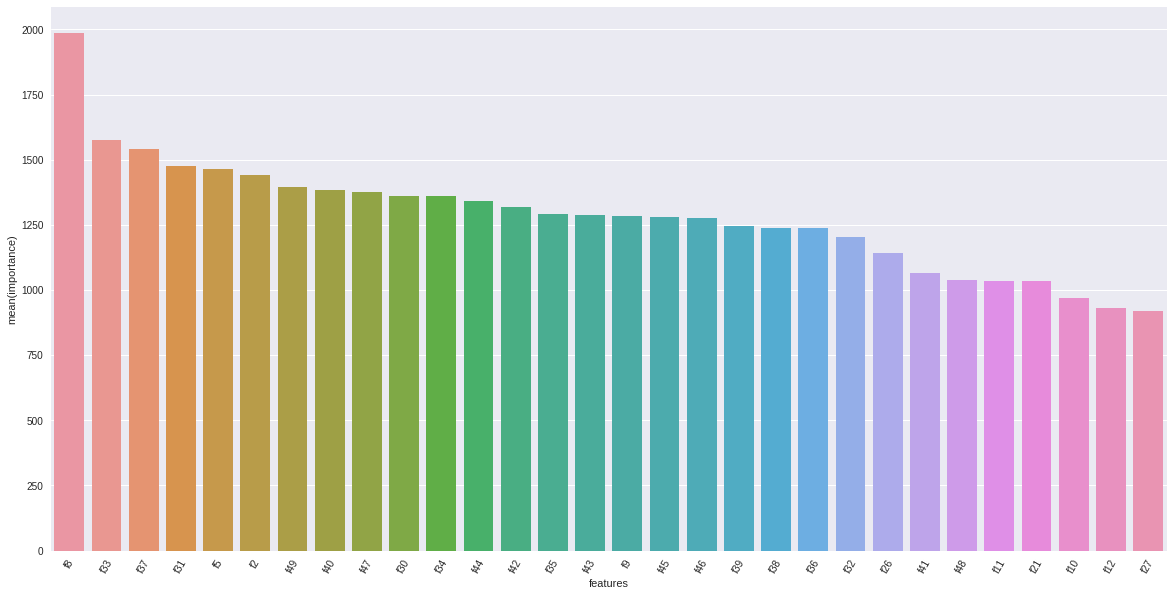

In [55]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=60)
sns.barplot(data=features.head(30),x="features",y="importance",ax=ax,orient="v")